## Comparing IMU to Autobender/Rotary Encoder

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from config import path_to_repository
from analysis import DLC3DBendAngles
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:2305: SyntaxWarning: invalid escape sequence '\D'
  ax[0].set_ylabel('$\Delta R/R_o$')
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:2312: SyntaxWarning: invalid escape sequence '\D'
  ax[1].set_ylabel('$\Delta R/R_o$')
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:2601: SyntaxWarning: invalid escape sequence '\D'
  ax1.set_ylabel('$\Delta R/R_o$', color='b')
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:2616: SyntaxWarning: invalid escape sequence '\e'
  ax2.set_xlabel('$\epsilon$ (strain)')


In [4]:
renc = os.path.join(path_to_repository , "CSV Data/8_16_25/2025_08_15_18_02_22/data_rotenc_2025_08_15_18_02_22.csv")
imu = os.path.join(path_to_repository , "CSV Data/8_16_25/2025_08_15_18_02_22/data_imu_2025_08_15_18_02_22.csv")

renc2 = os.path.join(path_to_repository , "CSV Data/8_16_25/2025_08_15_18_10_30/data_rotenc_2025_08_15_18_10_30.csv")
imu2 = os.path.join(path_to_repository , "CSV Data/8_16_25/2025_08_15_18_10_30/data_imu_2025_08_15_18_10_30.csv")


cam = os.path.join(path_to_repository , "CSV Data/8_13_25/2025_08_13_10_55_23/8.13_DLC_3D.csv")






In [5]:
#load DLC 3d coordinates from DLC triangulation
g = DLC3DBendAngles(cam)
h = DLC3DBendAngles(cam)


In [6]:
# Convert Quaternion data to angle between two imu's

# Step 1: Load data
g.load_imu_p_enc(imu, renc)
h.load_imu_p_enc(imu2, renc2)

# Step 2: Quat → Euler
g.imu_quat_to_euler(imu_cols=('euler1','euler2'), out_prefix=('imu1','imu2'))
h.imu_quat_to_euler(imu_cols=('euler1','euler2'), out_prefix=('imu1','imu2'))

# Step 3: Euler → unit vectors (take z-axis of each IMU)
g.euler_to_unit_vec(prefix='imu1', axis='z', out_col='imu1_zvec')
g.euler_to_unit_vec(prefix='imu2', axis='z', out_col='imu2_zvec')

h.euler_to_unit_vec(prefix='imu1', axis='z', out_col='imu1_zvec')
h.euler_to_unit_vec(prefix='imu2', axis='z', out_col='imu2_zvec')

# Step 4: Angle between IMUs
g.angle_between_vectors('imu1_zvec','imu2_zvec', out_col='imu_joint_deg')
h.angle_between_vectors('imu1_zvec','imu2_zvec', out_col='imu_joint_deg')

# Step 5: Add to dataframe with MultiIndex-like name
g.add_imu_angle_column(g.imu_df['imu_joint_deg'].to_numpy())
h.add_imu_angle_column(h.imu_df['imu_joint_deg'].to_numpy())

Loaded IMU shape: (1070, 3)
Loaded ENC shape: (440, 4)
Loaded IMU shape: (1100, 3)
Loaded ENC shape: (438, 4)


,timestamp,euler1,euler2,imu1_roll,imu1_pitch,imu1_yaw,imu2_roll,imu2_pitch,imu2_yaw,imu1_zvec,imu2_zvec,imu_joint_deg,metric_imu_joint_deg_deg
0,181037087422,"(0.99945068359375, 0.03167724609375, -0.006408...","(0.0, 0.0, 0.0, 0.0)",3.631719,-0.729827,-0.156099,0.000000,-0.000000,0.000000,"(-0.01288448819939718, -0.06330814820512878, 0...","(0.0, 0.0, 1.0)",3.704229,3.704229
1,181037104383,"(0.99945068359375, 0.0316162109375, -0.0063476...","(0.0, 0.0, 0.0, 0.0)",3.624585,-0.723511,-0.134860,0.000000,-0.000000,0.000000,"(-0.012750822338993856, -0.06318892285609351, ...","(0.0, 0.0, 1.0)",3.695996,3.695996
2,181037115741,"(0.99951171875, 0.0313720703125, -0.0062255859...","(0.0, 0.0, 0.0, 0.0)",3.596209,-0.710403,-0.106272,0.000000,-0.000000,0.000000,"(-0.012490458119058537, -0.06270142625696168, ...","(0.0, 0.0, 1.0)",3.665614,3.665614
3,181037126905,"(0.99951171875, 0.03131103515625, -0.006225585...","(0.0, 0.0, 0.0, 0.0)",3.589132,-0.710849,-0.092247,0.000000,-0.000000,0.000000,"(-0.012482774582483862, -0.06258119082545772, ...","(0.0, 0.0, 1.0)",3.658758,3.658758
4,181037141631,"(0.99951171875, 0.03118896484375, -0.006225585...","(1.0, 0.00054931640625, -6.103515625e-05, -0.0...",3.575150,-0.710863,-0.092161,0.062949,-0.006979,-0.027980,"(-0.012482720808796139, -0.06233765552594515, ...","(-0.0001223384887383435, -0.001098602609101475...",3.581955,3.581955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,181047048087,"(0.99981689453125, 0.01593017578125, -0.000183...","(0.803466796875, 0.59344482421875, 0.04296875,...",1.825091,-0.043928,1.440276,73.007709,2.587361,4.786985,"(3.444245963013857e-05, -0.031857665906033165,...","(0.09295493418576876, -0.9519072606137728, 0.2...",71.208475,71.208475
1096,181047056345,"(0.999755859375, 0.01629638671875, -0.00018310...","(0.80828857421875, 0.58685302734375, 0.0431518...",1.867143,-0.044915,1.468310,72.072600,2.614510,4.817669,"(5.163553546821456e-05, -0.03259141115961945, ...","(0.09389895253997141, -0.9469066106163267, 0.3...",70.233134,70.233134
1097,181047064811,"(0.999755859375, 0.016845703125, -0.0002441406...","(0.81396484375, 0.57891845703125, 0.0435180664...",1.929955,-0.053538,1.517103,70.956284,2.646828,4.884756,"(-4.193308215481682e-05, -0.03369062373265446,...","(0.09550460508769025, -0.9405536063346565, 0.3...",69.056928,69.056928
1098,181047074110,"(0.999755859375, 0.01776123046875, -0.00030517...","(0.8203125, 0.56982421875, 0.04400634765625, 0...",2.034690,-0.063284,1.593821,69.687587,2.674825,4.990582,"(-0.00011586899755175364, -0.03552153658741289...","(0.09772098781986271, -0.9328492255360241, 0.3...",67.686961,67.686961


C:\Users\toppe\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


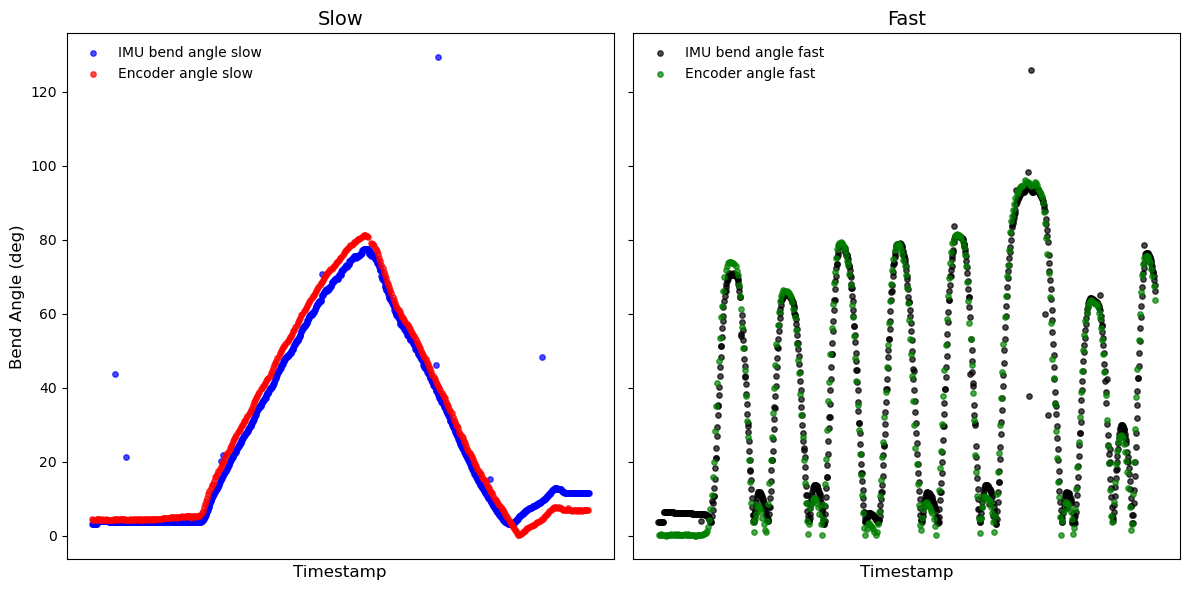

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# --- Left subplot: Slow ---
ax1.scatter(
    g.imu_df["timestamp"],
    g.imu_df["imu_joint_deg"],
    s=15, alpha=0.7, color="blue",
    label="IMU bend angle slow"
)

ax1.scatter(
    g.enc_df["timestamp"],
    g.enc_df["angle"].abs(),
    s=15, alpha=0.7, color="red",
    label="Encoder angle slow"
)

ax1.set_xlabel("Timestamp", fontsize=12)
ax1.set_ylabel("Bend Angle (deg)", fontsize=12)
ax1.set_xticks([])   # hide x tick labels
ax1.legend(frameon=False)
ax1.set_title("Slow", fontsize=14)

# --- Right subplot: Fast ---
ax2.scatter(
    h.imu_df["timestamp"],
    h.imu_df["imu_joint_deg"],
    s=15, alpha=0.7, color="black",
    label="IMU bend angle fast"
)

ax2.scatter(
    h.enc_df["timestamp"],
    h.enc_df["angle"].abs(),
    s=15, alpha=0.7, color="green",
    label="Encoder angle fast"
)

ax2.set_xlabel("Timestamp", fontsize=12)
ax2.set_xticks([])
ax2.legend(frameon=False)
ax2.set_title("Fast", fontsize=14)

plt.tight_layout()
plt.show()


In [8]:
# Attach IMU columns onto ENCODER rows (encoder is left table)
g.match_encoder_to_imu(
    enc_time_col="timestamp",      # encoder time column
    imu_time_col="timestamp",      # IMU time column
    tolerance="200ms",             # try 200ms → tighten/loosen as needed
    direction="nearest",
    columns=["imu_joint_deg", "timestamp"],  # or None for all IMU cols
    suffix="_imu",
    keep_time_delta=True,
    drop_unmatched=True,
)

# Attach IMU columns onto ENCODER rows (encoder is left table)
h.match_encoder_to_imu(
    enc_time_col="timestamp",      # encoder time column
    imu_time_col="timestamp",      # IMU time column
    tolerance="200ms",             # try 200ms → tighten/loosen as needed
    direction="nearest",
    columns=["imu_joint_deg", "timestamp"],  # or None for all IMU cols
    suffix="_imu",
    keep_time_delta=True,
    drop_unmatched=True,
)





[find_matching_indices] Dropping 0 camera rows with NaT timestamps.
[find_matching_indices] Dropping 0 encoder rows with NaT timestamps.
[debug] cam range: 0 days 18:02:31.210052 → 0 days 18:02:41.184300
[debug] enc range: 0 days 18:02:31.202506 → 0 days 18:02:41.196847
[debug] probe |delta| (ms) stats: count    20.000000
mean      2.142400
std       1.730945
min       0.350000
25%       0.732000
50%       1.623500
75%       2.905250
max       7.546000
Name: delta_ms, dtype: float64


C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:248: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  cam_small["_t_cam_ns"] = cam_small["t_cam_td"].view("i8")
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:249: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  enc_small["_t_enc_ns"] = enc_small["t_enc_td"].view("i8")


[find_matching_indices] Dropping 0 camera rows with NaT timestamps.
[find_matching_indices] Dropping 0 encoder rows with NaT timestamps.
[debug] cam range: 0 days 18:10:37.097066 → 0 days 18:10:47.072687
[debug] enc range: 0 days 18:10:37.087422 → 0 days 18:10:47.084095


C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:248: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  cam_small["_t_cam_ns"] = cam_small["t_cam_td"].view("i8")
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:249: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  enc_small["_t_enc_ns"] = enc_small["t_enc_td"].view("i8")


[debug] probe |delta| (ms) stats: count    21.000000
mean      2.748333
std       1.918656
min       0.383000
25%       1.233000
50%       2.501000
75%       3.743000
max       7.317000
Name: delta_ms, dtype: float64


,timestamp,raw,volts,angle,imu_joint_deg_imu,timestamp_imu,time_delta_imu
0,181037097066,14450,2.709375,-0.065611,3.695996,181037104383,7.317
1,181037121153,14471,2.713312,0.176826,3.665614,181037115741,-5.412
2,181037148197,14481,2.715187,0.292272,3.588814,181037154027,5.830
3,181037171001,14473,2.713688,0.199915,3.597051,181037165884,-5.117
4,181037193262,14446,2.708625,-0.111789,6.357582,181037195405,2.143
...,...,...,...,...,...,...,...
433,181046982625,8078,1.514625,-73.627772,75.098797,181046981305,-1.320
434,181047004172,8213,1.539937,-72.069252,74.113432,181047000575,-3.597
435,181047027392,8381,1.571438,-70.129760,72.073102,181047029664,2.272
436,181047050932,8619,1.616062,-67.382146,71.208475,181047048087,-2.845


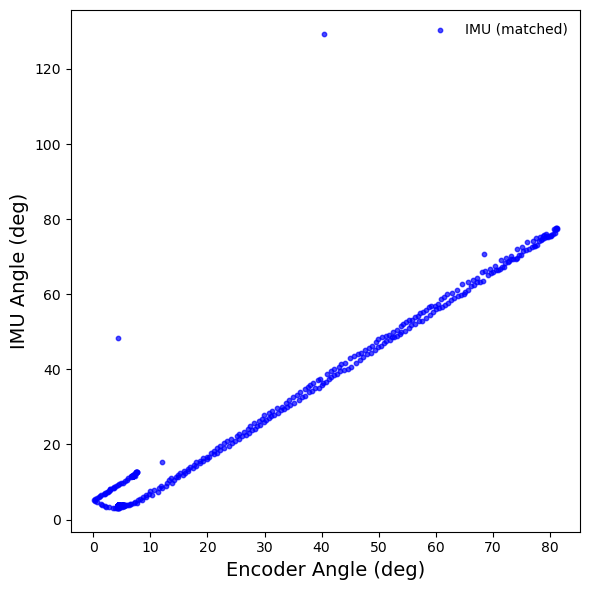

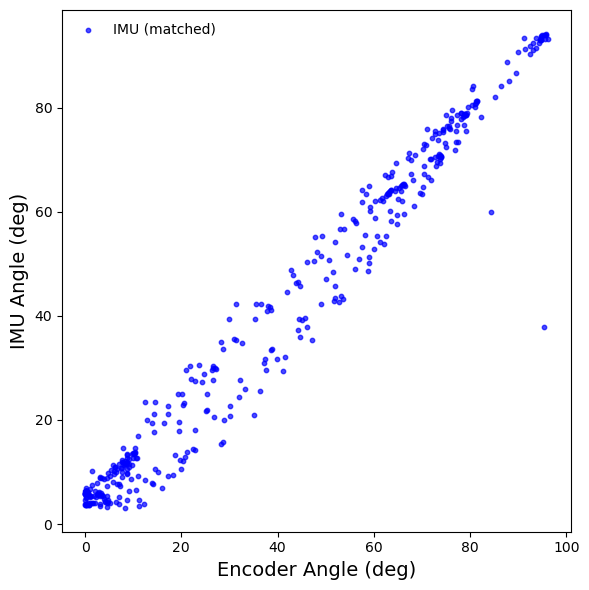

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(g.enc_df["angle"].abs(), g.enc_df["imu_joint_deg_imu"], color="blue", s=10, alpha=0.7, label="IMU (matched)")
ax.set_xlabel("Encoder Angle (deg)", fontsize=14)
ax.set_ylabel("IMU Angle (deg)", fontsize=14)
#ax.set_xticks([])  # hide tick labels if you prefer
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(h.enc_df["angle"].abs(), h.enc_df["imu_joint_deg_imu"], color="blue", s=10, alpha=0.7, label="IMU (matched)")
ax.set_xlabel("Encoder Angle (deg)", fontsize=14)
ax.set_ylabel("IMU Angle (deg)", fontsize=14)
#ax.set_xticks([])  # hide tick labels if you prefer
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

In [10]:
_, stats = g.add_encoder_angular_velocity(
    angle_col="angle",
    time_col="timestamp",
    out_col="enc_angvel_dps",
    time_format="HMSfn",   # <-- key for HHMMSSffffff
    unwrap=False,
    smoothing=None
)
median_speed_slow = stats["median_speed_dps"]   # this is the median |angle/sec|
print(f"Median speed: {median_speed_slow:.3f} deg/s")

_, stats = h.add_encoder_angular_velocity(
    angle_col="angle",
    time_col="timestamp",
    out_col="enc_angvel_dps",
    time_format="HMSfn",   # <-- key for HHMMSSffffff
    unwrap=False,
    smoothing=None
)
median_speed_fast = stats["median_speed_dps"]   # this is the median |angle/sec|
print(f"Median speed: {median_speed_fast:.3f} deg/s")

Median speed: 18.516 deg/s
Median speed: 108.201 deg/s


C:\Users\toppe\AppData\Local\Temp\ipykernel_14124\3808278365.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


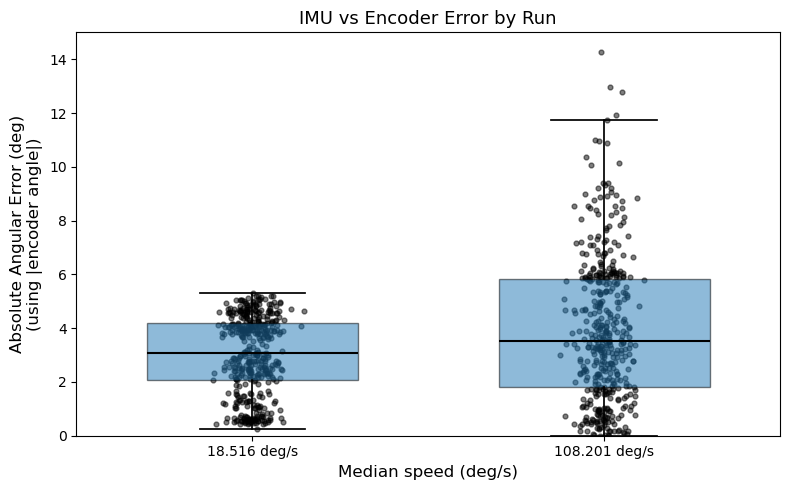

18.516 deg/s: mae_posenc=3.282, max_abs_error_posenc=89.028, n_posenc=440
108.201 deg/s: mae_posenc=4.079, max_abs_error_posenc=57.581, n_posenc=438


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# --- Configure your runs (objects + label text, e.g., from median speeds) ---
runs = [
    (g, f"{median_speed_slow:.3f} deg/s"),
    (h, f"{median_speed_fast:.3f} deg/s"),
    # add more like: (k, f"{median_speed_k:.3f} deg/s"),
]

enc_angle_col = "angle"              # or "angle_renc"
imu_angle_col = "imu_joint_deg_imu"  # IMU estimate (post-match)
time_col      = "timestamp"

# --- Collect absolute errors and metrics (using |encoder angle|) ---
errors_per_run = []
labels = []
metrics_list = []  # keep original metrics + quick summaries based on |encoder|

for obj, label in runs:
    metrics, df_err = obj.compute_imu_vs_encoder_error(
        source="enc",
        enc_angle_col=enc_angle_col,
        imu_angle_col=imu_angle_col,
        time_col=time_col,
        thresholds=(1, 2, 5)
    )

    # Recompute absolute error using |encoder angle|
    enc = np.asarray(df_err[enc_angle_col].to_numpy(), dtype=float)
    imu = np.asarray(df_err[imu_angle_col].to_numpy(), dtype=float)

    # finite mask in case of NaNs
    finite = np.isfinite(enc) & np.isfinite(imu)
    enc = enc[finite]
    imu = imu[finite]

    # force encoder positive, then compute abs error = | |enc| - imu |
    aerr_posenc = np.abs(np.abs(enc) - imu)

    # Keep finite values only
    aerr_posenc = aerr_posenc[np.isfinite(aerr_posenc)]
    if aerr_posenc.size == 0:
        continue

    errors_per_run.append(aerr_posenc)
    labels.append(label)

    # (optional) augment metrics with summaries based on |encoder|
    summary_posenc = {
        "mae_posenc": float(np.mean(aerr_posenc)),
        "max_abs_error_posenc": float(np.max(aerr_posenc)),
        "n_posenc": int(aerr_posenc.size),
    }
    metrics_list.append((label, {**metrics, **summary_posenc}))

# --- Plot: same color for all boxes + jittered points ---
box_color  = "#1f77b4"
box_alpha  = 0.5
data_alpha = 0.5
jitter     = 0.04

fig, ax = plt.subplots(figsize=(8, 5))

bp = ax.boxplot(
    errors_per_run,
    labels=labels,
    patch_artist=True,
    showfliers=False,
    widths=0.6
)

# Style boxes (uniform color)
for patch in bp["boxes"]:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor("black")
for med in bp["medians"]:
    med.set_color("black"); med.set_linewidth(1.5)
for w in bp["whiskers"]:
    w.set_color("black"); w.set_linewidth(1.25)
for cap in bp["caps"]:
    cap.set_color("black"); cap.set_linewidth(1.25)

# Overlay jittered points
for i, arr in enumerate(errors_per_run, start=1):
    x = np.random.normal(loc=i, scale=jitter, size=len(arr))
    ax.scatter(x, arr, s=12, alpha=data_alpha, color="black")

ax.set_xlabel("Median speed (deg/s)", fontsize=12)
ax.set_ylabel("Absolute Angular Error (deg)\n(using |encoder angle|)", fontsize=12)
ax.set_ylim(0, 15)  # adjust to your range
ax.set_title("IMU vs Encoder Error by Run", fontsize=13)

plt.tight_layout()
plt.savefig("imu_enc_box_multi.png", dpi=300, bbox_inches="tight")
plt.show()

# Optional: inspect metrics per group (includes *_posenc summaries)
for label, m in metrics_list:
    print(f"{label}: mae_posenc={m['mae_posenc']:.3f}, "
          f"max_abs_error_posenc={m['max_abs_error_posenc']:.3f}, n_posenc={m['n_posenc']}")
